# TEST

Dummy notebook to test functions

In [1]:
import nbimporter
import prepData as prep
import fitFunc as fits
import Statistics as stat

import matplotlib.pyplot as plt
import numpy as np 

/home/edi/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Test prepData

Import data from example run and prepare it for further analysis.

In [2]:
data,center,length = prep.load_dataset(395)
freq, fft, weights, ref, N = prep.prep_data(data,center, length=length)

Dataset loaded: db/AnalyzedDataFFT_Run_395_sliced.xlsx
Cavity frequency: 10353468841.0 Hz
fft subrun:2


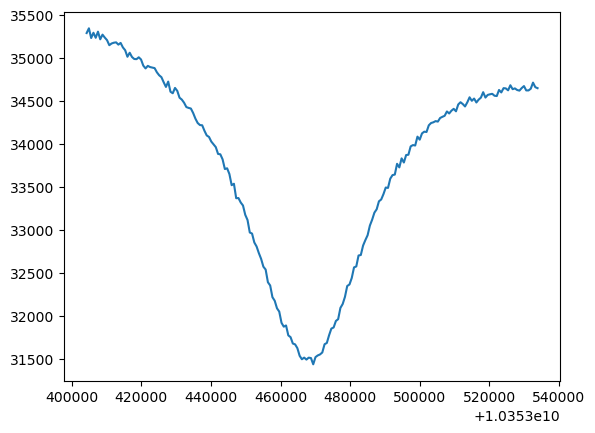

In [3]:
plt.plot(freq, fft)

## Test Fits

### Background Fit

First fit background and check the distribution of residuals.

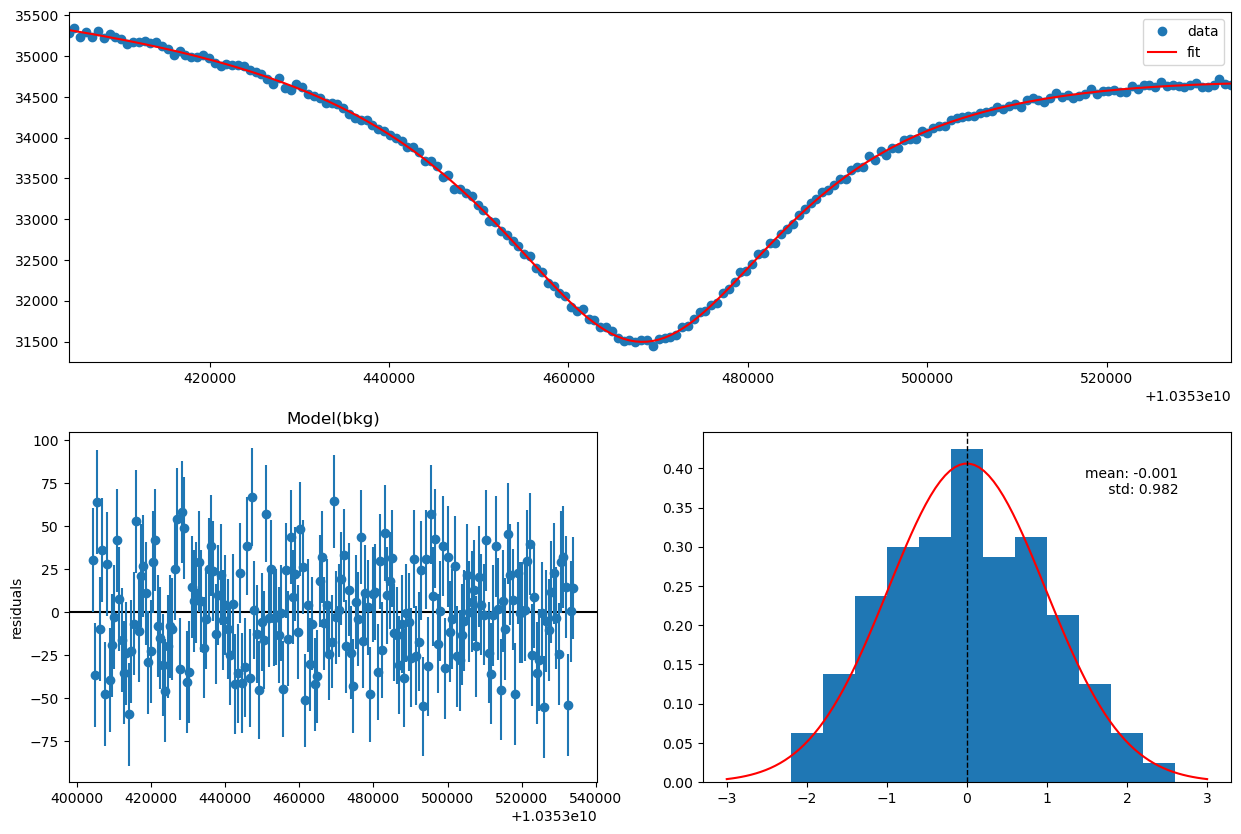

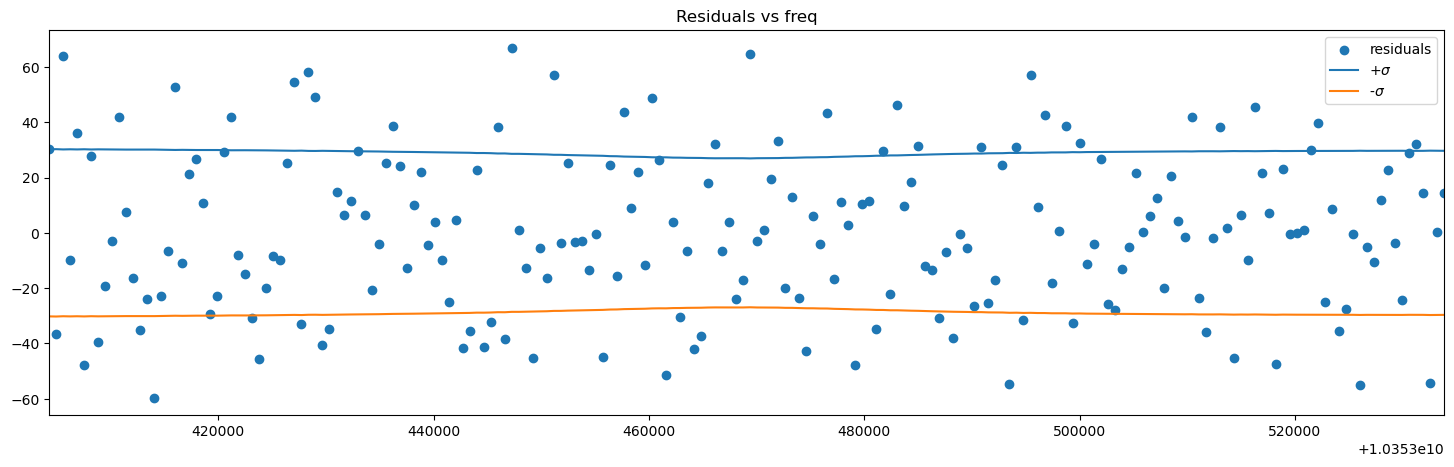

In [4]:
res_bkg = fits.fit_bkg(freq, fft, weights, center, ref)
fits.plot_fit(freq, fft, weights, res_bkg)

### Signal FIt

Fit signal function using every possible frequency as the centre of the signal and check the values of $\mu$ obtained. 

In [5]:
bkg_params = res_bkg.best_values

mu_fit = np.empty(len(freq))
for i in range(len(freq)):
    res_sig = fits.fit_sig(x=freq, y=fft, w=weights, x_0=freq[i],
                           init_params=bkg_params, signal=fits.signal_gauss, par_vary=False)
    mu_fit[i] = res_sig.best_values["mu"]

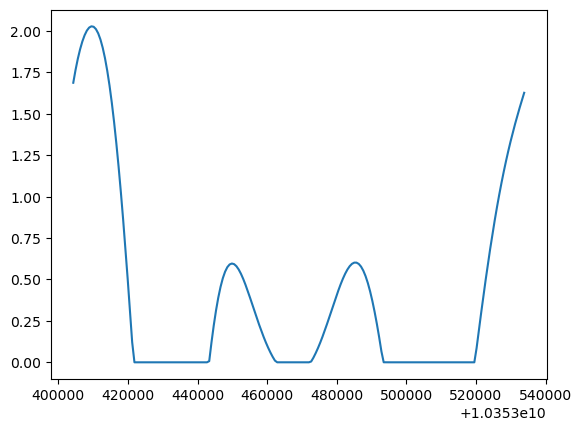

In [6]:
plt.plot(freq, mu_fit)

Check fit results for maximum $\mu$ obtained.

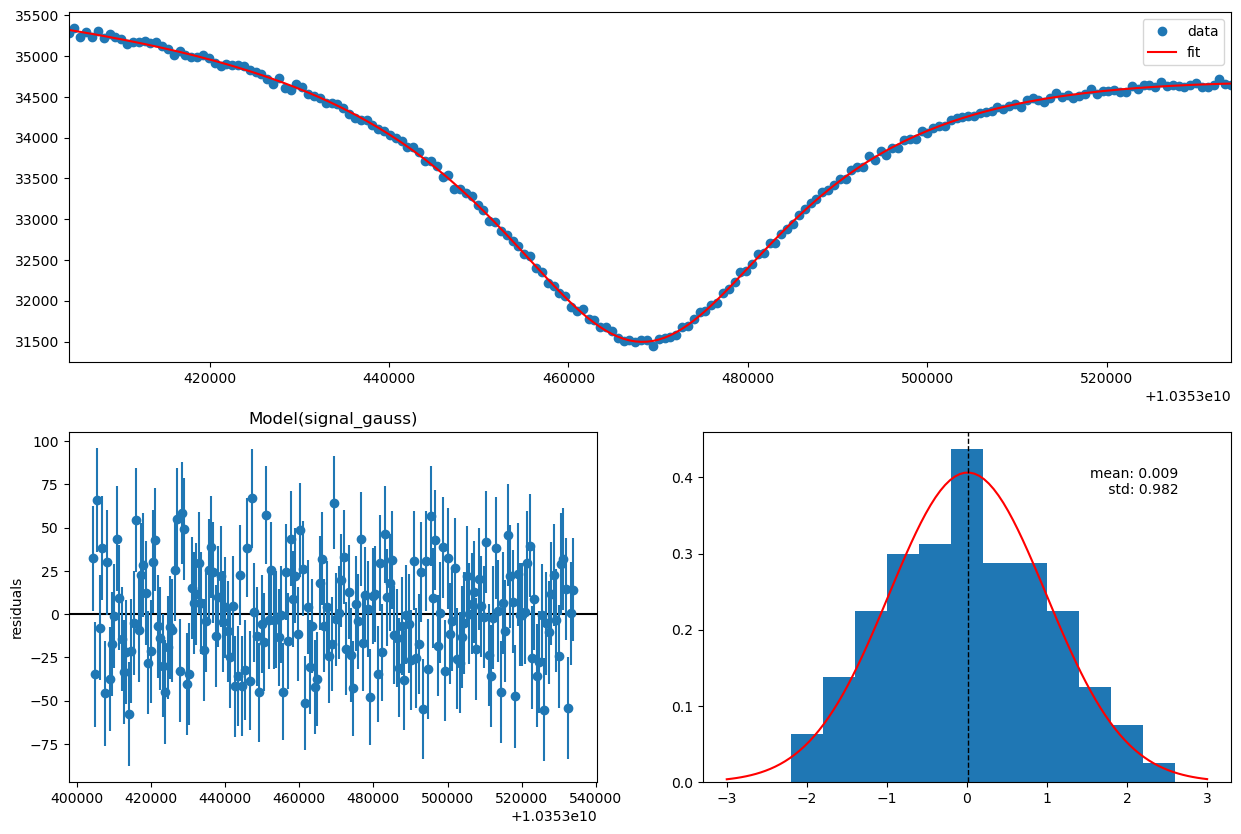

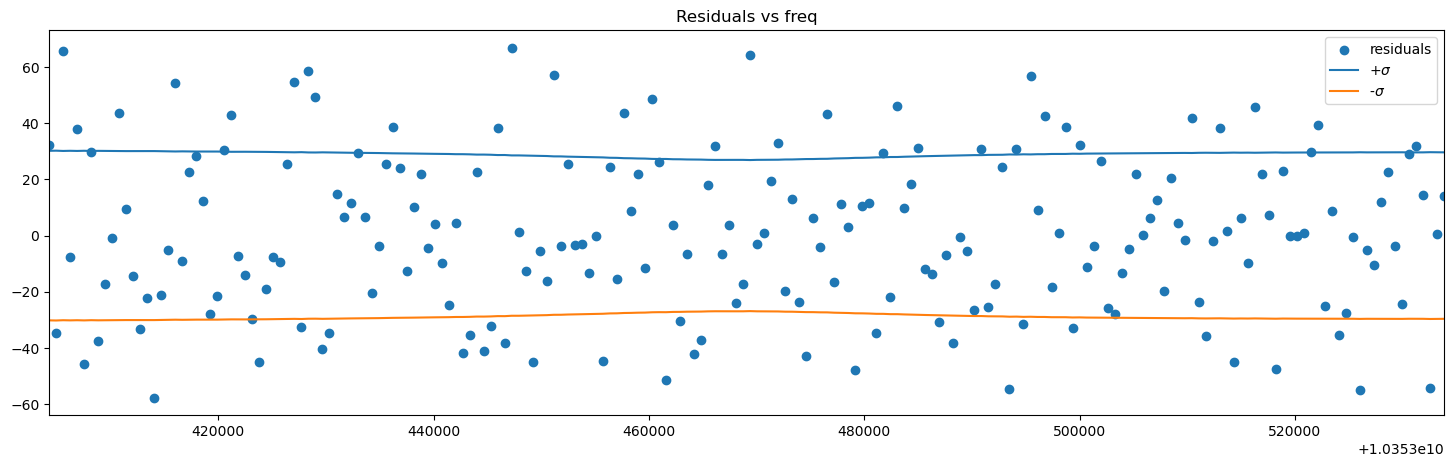

In [7]:
x0_max = freq[np.argmax(mu_fit)]

res_sig = fits.fit_sig(x=freq, y=fft, w=weights, x_0=x0_max,
                       init_params=bkg_params, signal=fits.signal_gauss, par_vary=False)
fits.plot_fit(freq, fft, weights, res_sig)

If you let every parameter vary, the fit does not converge for $\mu$ and it gets stuck on the starting value.

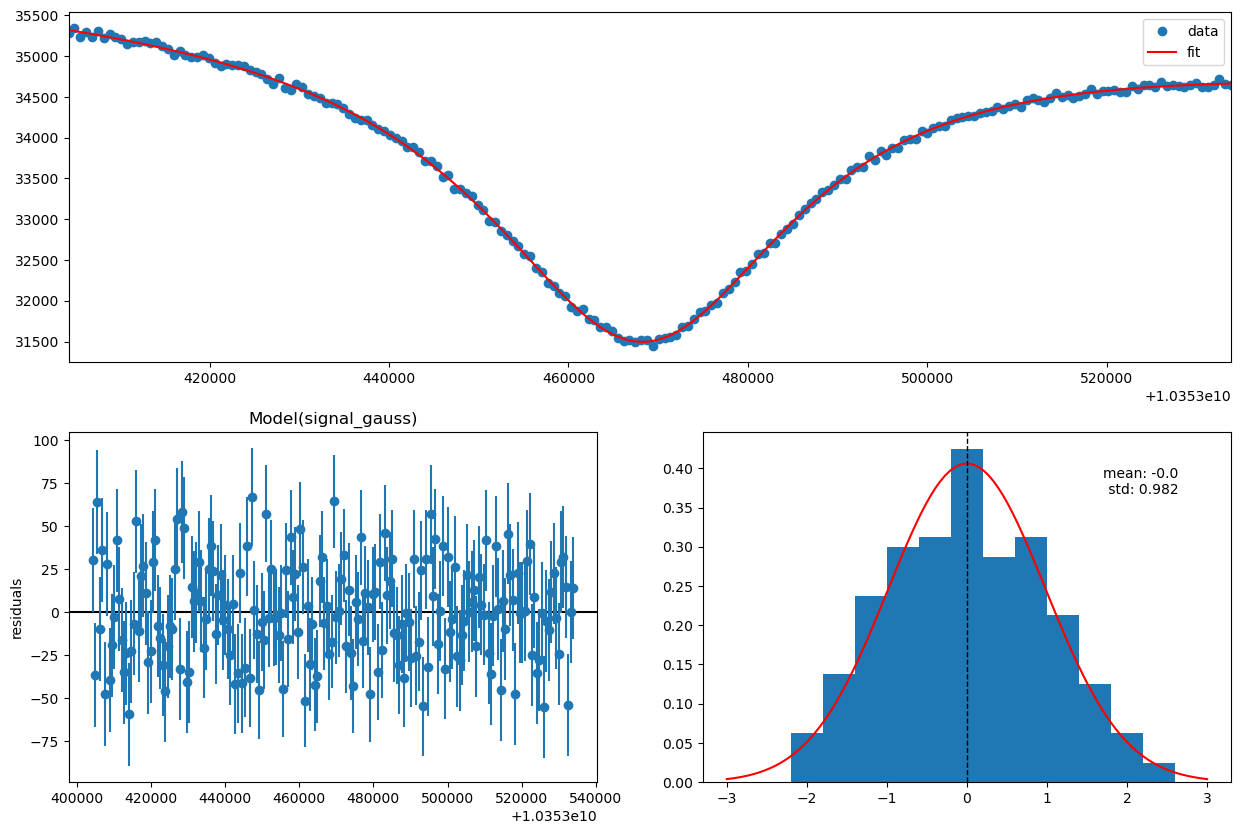

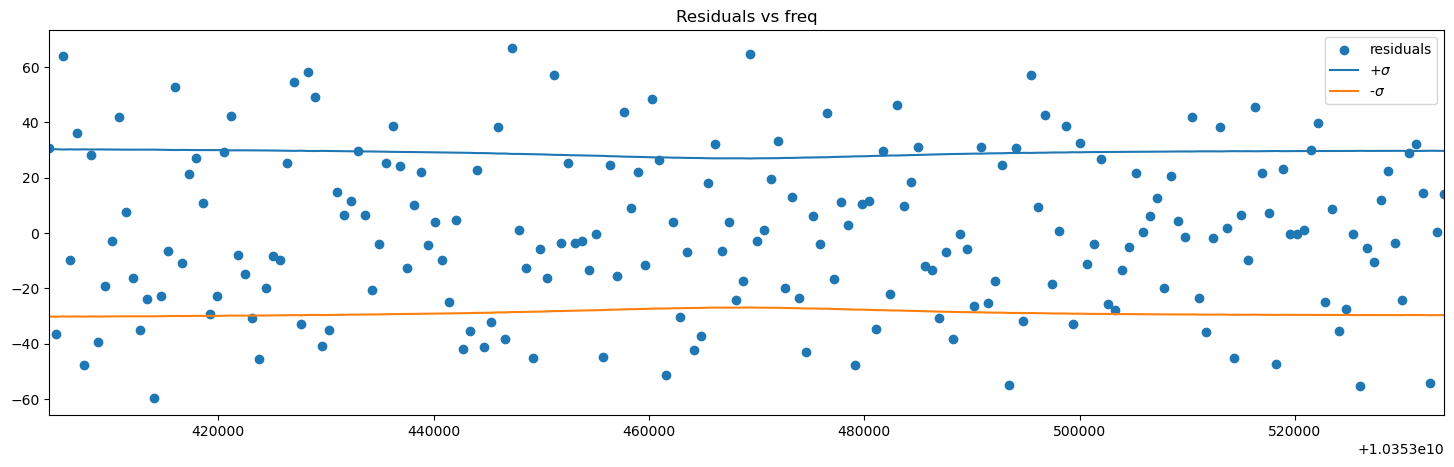

In [8]:
res_sig = fits.fit_sig(x=freq, y=fft, w=weights, x_0=x0_max,
                       init_params=bkg_params, signal=fits.signal_gauss, par_vary=True, mu_init=0.1)
fits.plot_fit(freq, fft, weights, res_sig)

## Test Statistics

Compute likelihood ratio over observed data.

In [9]:
q0_obs = stat.lh_ratio(fft, res_bkg.best_fit, res_sig.best_fit)
q0_obs

0.010000322994528688

### Significance

Compute significance as a function of the center of the signal.

In [10]:
z_tot, _ = stat.stat_test(run=395, x_0=freq, mu_fix=np.array([]),
                          signal=fits.signal_gauss, n_toy=500,
                          calc_z=True, calc_CI=False, draw=False, verbose=False, path='db/')

Dataset loaded: db/AnalyzedDataFFT_Run_395_sliced.xlsx
Cavity frequency: 10353468841.0 Hz
fft subrun:2
Step: 20
Step: 40
Step: 60
Step: 80
Step: 100
Step: 120
Step: 140
Step: 160
Step: 180
Step: 200


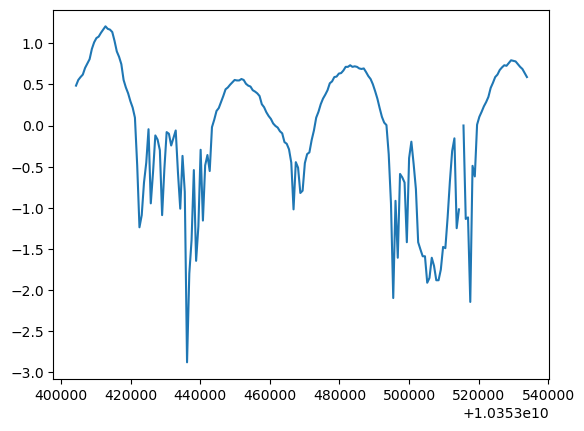

In [11]:
plt.plot(freq, z_tot)

In [12]:
np.max(z_tot), freq[np.argmax(z_tot)]

(1.205526795972518, 10353412760.416666)

Here are some example of the likelihood ratio distribution for different $x_0$: the maximum value of $\hat{\mu}$, the center of the cavity and a secondary peak of $\hat{\mu}$.

Dataset loaded: db/AnalyzedDataFFT_Run_395_sliced.xlsx
Cavity frequency: 10353468841.0 Hz
fft subrun:2


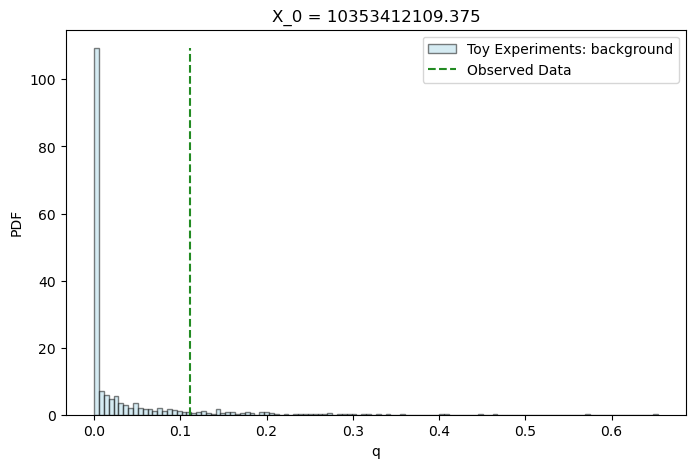

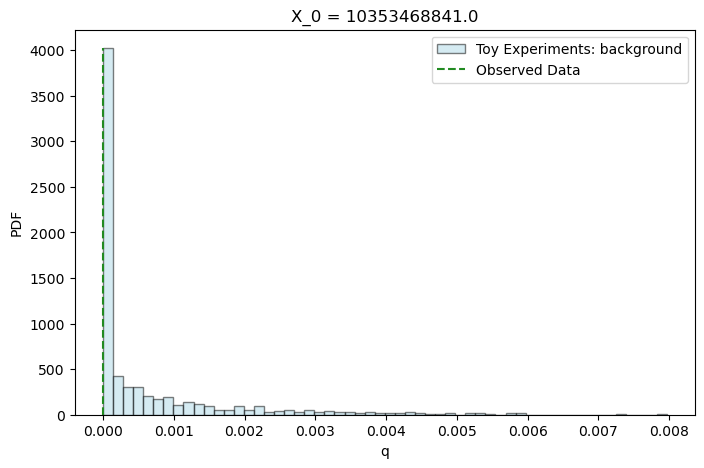

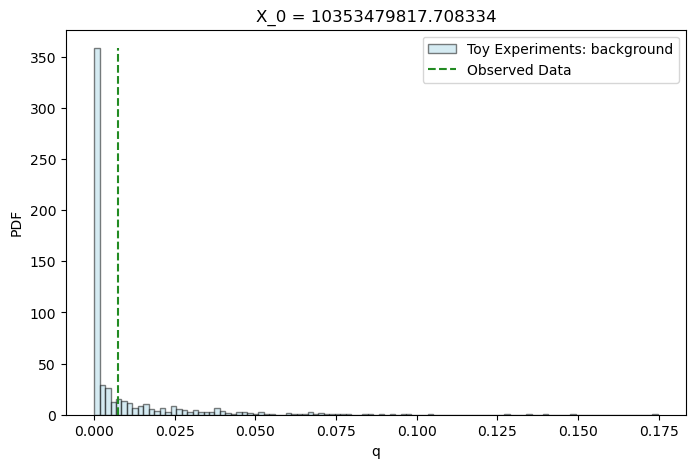

In [13]:
z, _ = stat.stat_test(run=395, x_0=[10353412109.375, center, freq[116]], mu_fix=np.array([]),
                      signal=fits.signal_gauss, n_toy=1000,
                      calc_z=True, calc_CI=False, draw=True, verbose=False, path='db/')

In [14]:
z

array([ 1.27587418, -0.92685851,  0.64026551])

### Confidence Interval

Compute $\mu^{95\% CL}$ for the frequency where we have the maximum of $\hat{\mu}$.

Dataset loaded: db/AnalyzedDataFFT_Run_395_sliced.xlsx
Cavity frequency: 10353468841.0 Hz
fft subrun:2
Mu:  20.0    q(mu)_obs = 14.84895983762135 
p_mu = 0.016   p_b = 0.271   ratio = 0.05904059040590406 

Mu:  21.0    q(mu)_obs = 16.28972854110384 
p_mu = 0.019   p_b = 0.271   ratio = 0.07011070110701106 

Mu:  22.0    q(mu)_obs = 17.796934075204035 
p_mu = 0.018   p_b = 0.271   ratio = 0.06642066420664205 

Mu:  23.0    q(mu)_obs = 19.370566915912377 
p_mu = 0.017   p_b = 0.271   ratio = 0.06273062730627306 

Mu:  24.0    q(mu)_obs = 21.010617540671774 
p_mu = 0.012   p_b = 0.271   ratio = 0.04428044280442804 

Mu:  25.0    q(mu)_obs = 22.71707642837464 
p_mu = 0.01   p_b = 0.271   ratio = 0.03690036900369004 

Mu:  26.0    q(mu)_obs = 24.489934059355164 
p_mu = 0.015   p_b = 0.271   ratio = 0.05535055350553505 

Mu:  27.0    q(mu)_obs = 26.329180915391362 
p_mu = 0.013   p_b = 0.271   ratio = 0.047970479704797044 

Mu:  28.0    q(mu)_obs = 28.234807479716437 
p_mu = 0.006   p_b = 0.

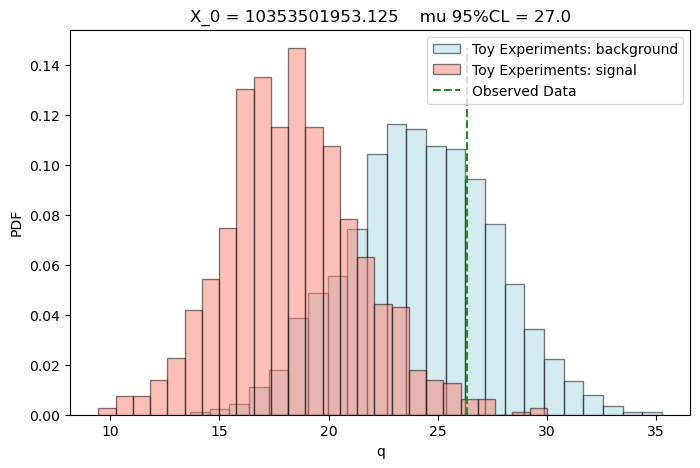

Mu:  20.0    q(mu)_obs = 15.017077892162206 
p_mu = 0.013   p_b = 0.259   ratio = 0.05019305019305019 

Mu:  21.0    q(mu)_obs = 16.460909105994688 
p_mu = 0.013   p_b = 0.259   ratio = 0.05019305019305019 

Mu:  22.0    q(mu)_obs = 17.970669024693507 
p_mu = 0.014   p_b = 0.259   ratio = 0.05405405405405405 

Mu:  23.0    q(mu)_obs = 19.546348228986517 
p_mu = 0.006   p_b = 0.259   ratio = 0.023166023166023165 

Mu:  24.0    q(mu)_obs = 21.187937301017428 
p_mu = 0.005   p_b = 0.259   ratio = 0.019305019305019305 

Mu:  25.0    q(mu)_obs = 22.895426824369906 
p_mu = 0.008   p_b = 0.259   ratio = 0.03088803088803089 

Mu:  26.0    q(mu)_obs = 24.66880738405439 
p_mu = 0.008   p_b = 0.259   ratio = 0.03088803088803089 

Mu:  27.0    q(mu)_obs = 26.50806956648944 
p_mu = 0.002   p_b = 0.259   ratio = 0.007722007722007722 

Mu:  28.0    q(mu)_obs = 28.41320395953926 
p_mu = 0.002   p_b = 0.259   ratio = 0.007722007722007722 

Mu:  29.0    q(mu)_obs = 30.384201152485048 
p_mu = 0.004   p_b

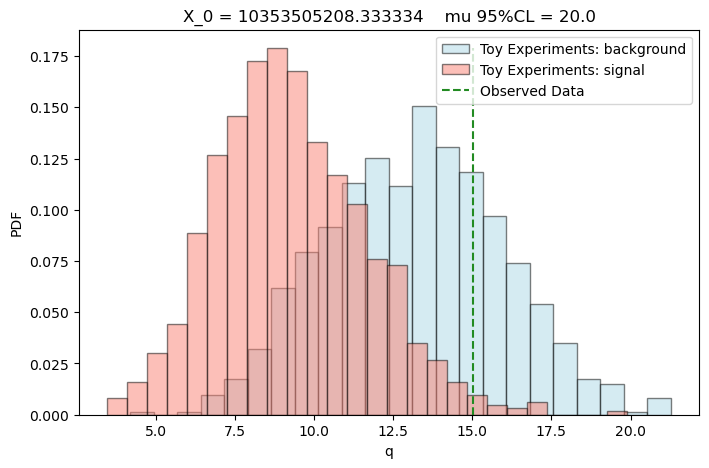

Mu:  20.0    q(mu)_obs = 14.908717265093628 
p_mu = 0.009   p_b = 0.27   ratio = 0.033333333333333326 

Mu:  21.0    q(mu)_obs = 16.34276166535051 
p_mu = 0.011   p_b = 0.27   ratio = 0.04074074074074074 

Mu:  22.0    q(mu)_obs = 17.84231930629244 
p_mu = 0.007   p_b = 0.27   ratio = 0.025925925925925925 

Mu:  23.0    q(mu)_obs = 19.407380851774178 
p_mu = 0.01   p_b = 0.27   ratio = 0.037037037037037035 

Mu:  24.0    q(mu)_obs = 21.037936967054293 
p_mu = 0.004   p_b = 0.27   ratio = 0.014814814814814814 

Mu:  25.0    q(mu)_obs = 22.73397831882562 
p_mu = 0.008   p_b = 0.27   ratio = 0.029629629629629627 

Mu:  26.0    q(mu)_obs = 24.495495575161158 
p_mu = 0.006   p_b = 0.27   ratio = 0.02222222222222222 

Mu:  27.0    q(mu)_obs = 26.322479405549984 
p_mu = 0.002   p_b = 0.27   ratio = 0.007407407407407407 

Mu:  28.0    q(mu)_obs = 28.21492048090022 
p_mu = 0.002   p_b = 0.27   ratio = 0.007407407407407407 

Mu:  29.0    q(mu)_obs = 30.172809473534244 
p_mu = 0.003   p_b = 0.27 

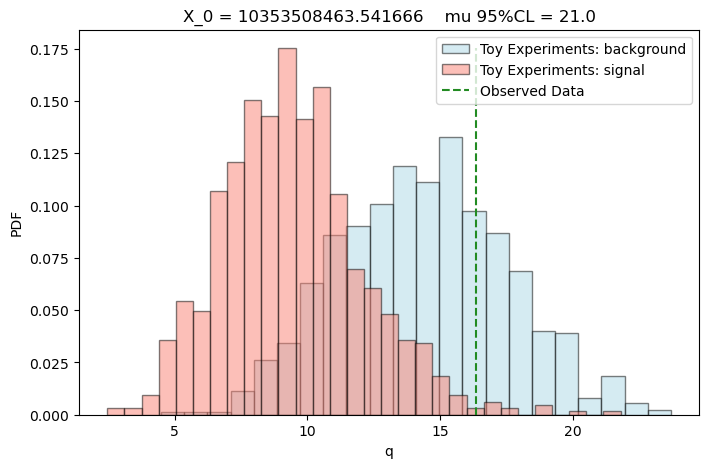

Mu:  20.0    q(mu)_obs = 14.522191353016524 
p_mu = 0.019   p_b = 0.291   ratio = 0.06529209621993128 

Mu:  21.0    q(mu)_obs = 15.932945111228946 
p_mu = 0.016   p_b = 0.291   ratio = 0.05498281786941581 

Mu:  22.0    q(mu)_obs = 17.408835041399698 
p_mu = 0.014   p_b = 0.291   ratio = 0.048109965635738834 

Mu:  23.0    q(mu)_obs = 18.949851873835314 
p_mu = 0.007   p_b = 0.291   ratio = 0.024054982817869417 

Mu:  24.0    q(mu)_obs = 20.55598634025705 
p_mu = 0.013   p_b = 0.291   ratio = 0.044673539518900345 

Mu:  25.0    q(mu)_obs = 22.22722917377473 
p_mu = 0.006   p_b = 0.291   ratio = 0.02061855670103093 

Mu:  26.0    q(mu)_obs = 23.963571108896076 
p_mu = 0.005   p_b = 0.291   ratio = 0.01718213058419244 

Mu:  27.0    q(mu)_obs = 25.765002881521013 
p_mu = 0.001   p_b = 0.291   ratio = 0.0034364261168384883 

Mu:  28.0    q(mu)_obs = 27.63151522895032 
p_mu = 0.005   p_b = 0.291   ratio = 0.01718213058419244 

Mu:  29.0    q(mu)_obs = 29.563098889883122 
p_mu = 0.001   p_

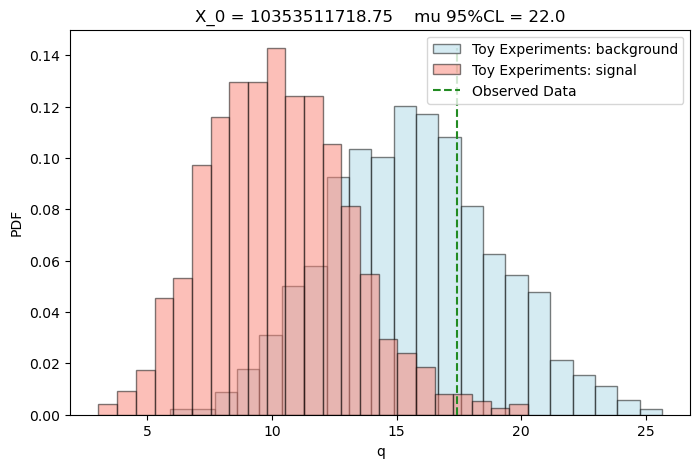

Mu:  20.0    q(mu)_obs = 13.885602598903915 
p_mu = 0.035   p_b = 0.336   ratio = 0.10416666666666667 

Mu:  21.0    q(mu)_obs = 15.25959389297077 
p_mu = 0.018   p_b = 0.336   ratio = 0.05357142857142856 

Mu:  22.0    q(mu)_obs = 16.69825196385159 
p_mu = 0.025   p_b = 0.336   ratio = 0.0744047619047619 

Mu:  23.0    q(mu)_obs = 18.201567598921883 
p_mu = 0.014   p_b = 0.336   ratio = 0.041666666666666664 

Mu:  24.0    q(mu)_obs = 19.769531586931635 
p_mu = 0.016   p_b = 0.336   ratio = 0.047619047619047616 

Mu:  25.0    q(mu)_obs = 21.402134718029856 
p_mu = 0.021   p_b = 0.336   ratio = 0.0625 

Mu:  26.0    q(mu)_obs = 23.09936778374731 
p_mu = 0.011   p_b = 0.336   ratio = 0.03273809523809523 

Mu:  27.0    q(mu)_obs = 24.861221576989692 
p_mu = 0.007   p_b = 0.336   ratio = 0.020833333333333332 

Mu:  28.0    q(mu)_obs = 26.687686892073998 
p_mu = 0.004   p_b = 0.336   ratio = 0.011904761904761904 

Mu:  29.0    q(mu)_obs = 28.57875452467988 
p_mu = 0.005   p_b = 0.336   rati

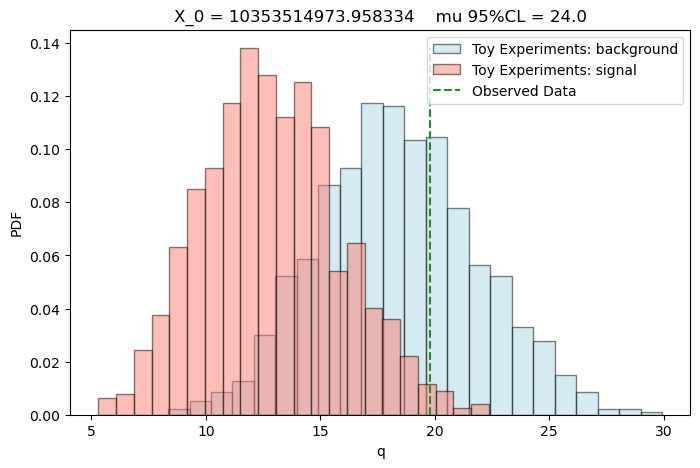

Mu:  20.0    q(mu)_obs = 13.034797513429794 
p_mu = 0.08   p_b = 0.413   ratio = 0.19370460048426152 

Mu:  21.0    q(mu)_obs = 14.357049978419582 
p_mu = 0.078   p_b = 0.413   ratio = 0.18886198547215496 

Mu:  22.0    q(mu)_obs = 15.743093679030153 
p_mu = 0.074   p_b = 0.413   ratio = 0.1791767554479419 

Mu:  23.0    q(mu)_obs = 17.192919472320227 
p_mu = 0.059   p_b = 0.413   ratio = 0.14285714285714285 

Mu:  24.0    q(mu)_obs = 18.70651821676438 
p_mu = 0.048   p_b = 0.414   ratio = 0.11594202898550725 

Mu:  25.0    q(mu)_obs = 20.2838807721987 
p_mu = 0.043   p_b = 0.414   ratio = 0.10386473429951691 

Mu:  26.0    q(mu)_obs = 21.924997999832158 
p_mu = 0.029   p_b = 0.414   ratio = 0.07004830917874397 

Mu:  27.0    q(mu)_obs = 23.629860762256385 
p_mu = 0.024   p_b = 0.414   ratio = 0.057971014492753624 

Mu:  28.0    q(mu)_obs = 25.398459923442715 
p_mu = 0.034   p_b = 0.414   ratio = 0.0821256038647343 

Mu:  29.0    q(mu)_obs = 27.230786348734 
p_mu = 0.023   p_b = 0.414 

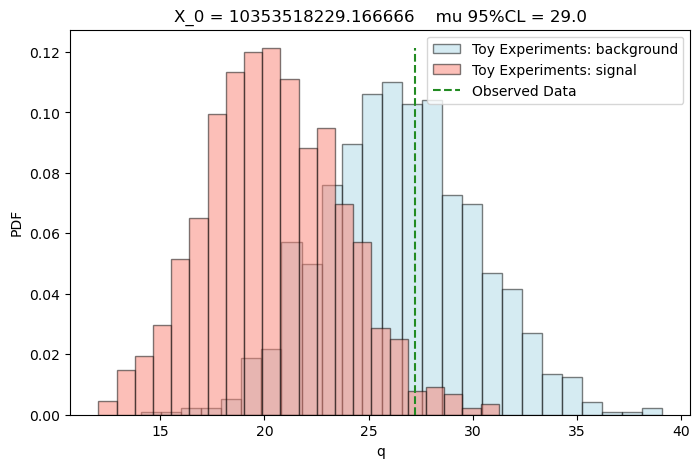

Mu:  20.0    q(mu)_obs = 11.985475702798567 
p_mu = 0.187   p_b = 0.529   ratio = 0.3534971644612476 

Mu:  21.0    q(mu)_obs = 13.235148155802108 
p_mu = 0.155   p_b = 0.529   ratio = 0.2930056710775047 

Mu:  22.0    q(mu)_obs = 14.54671419108081 
p_mu = 0.182   p_b = 0.529   ratio = 0.34404536862003776 

Mu:  23.0    q(mu)_obs = 15.920164817538762 
p_mu = 0.159   p_b = 0.529   ratio = 0.3005671077504726 

Mu:  24.0    q(mu)_obs = 17.355491045440203 
p_mu = 0.143   p_b = 0.529   ratio = 0.2703213610586011 

Mu:  25.0    q(mu)_obs = 18.852683886430896 
p_mu = 0.139   p_b = 0.529   ratio = 0.2627599243856333 

Mu:  26.0    q(mu)_obs = 20.411734353499014 
p_mu = 0.11   p_b = 0.529   ratio = 0.20793950850661624 

Mu:  27.0    q(mu)_obs = 22.032633461007435 
p_mu = 0.117   p_b = 0.529   ratio = 0.22117202268431002 

Mu:  28.0    q(mu)_obs = 23.71537222468146 
p_mu = 0.109   p_b = 0.529   ratio = 0.2060491493383743 

Mu:  29.0    q(mu)_obs = 25.459941661597668 
p_mu = 0.094   p_b = 0.529  

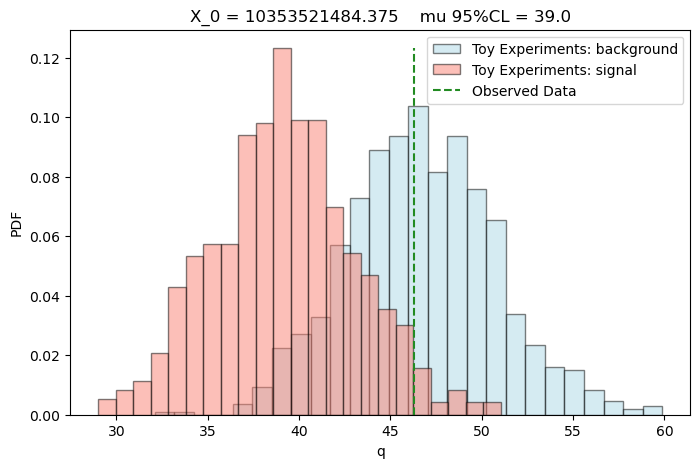

Mu:  20.0    q(mu)_obs = 10.708565341161147 
p_mu = 0.361   p_b = 0.677   ratio = 0.5332348596750369 

Mu:  21.0    q(mu)_obs = 11.85351317243203 
p_mu = 0.341   p_b = 0.677   ratio = 0.5036927621861153 

Mu:  22.0    q(mu)_obs = 13.056539568524386 
p_mu = 0.351   p_b = 0.677   ratio = 0.518463810930576 

Mu:  23.0    q(mu)_obs = 14.317635932300618 
p_mu = 0.305   p_b = 0.677   ratio = 0.4505169867060561 

Mu:  24.0    q(mu)_obs = 15.636793667931443 
p_mu = 0.285   p_b = 0.677   ratio = 0.42097488921713433 

Mu:  25.0    q(mu)_obs = 17.014004180909524 
p_mu = 0.258   p_b = 0.677   ratio = 0.3810930576070901 

Mu:  26.0    q(mu)_obs = 18.449258878053342 
p_mu = 0.235   p_b = 0.677   ratio = 0.3471196454948301 

Mu:  27.0    q(mu)_obs = 19.94254916750151 
p_mu = 0.214   p_b = 0.677   ratio = 0.3161004431314623 

Mu:  28.0    q(mu)_obs = 21.493866458701632 
p_mu = 0.249   p_b = 0.677   ratio = 0.3677991137370753 

Mu:  29.0    q(mu)_obs = 23.10320216244054 
p_mu = 0.214   p_b = 0.677   ra

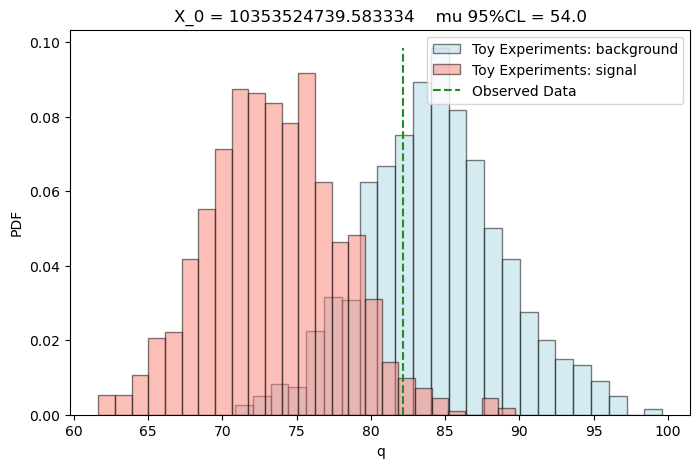

Mu:  20.0    q(mu)_obs = 9.12940585186675 
p_mu = 0.445   p_b = 0.742   ratio = 0.5997304582210242 

Mu:  21.0    q(mu)_obs = 10.125695710449236 
p_mu = 0.419   p_b = 0.742   ratio = 0.5646900269541779 

Mu:  22.0    q(mu)_obs = 11.173515831119857 
p_mu = 0.413   p_b = 0.742   ratio = 0.5566037735849056 

Mu:  23.0    q(mu)_obs = 12.272858484434664 
p_mu = 0.367   p_b = 0.742   ratio = 0.4946091644204852 

Mu:  24.0    q(mu)_obs = 13.423715942168428 
p_mu = 0.374   p_b = 0.742   ratio = 0.5040431266846361 

Mu:  25.0    q(mu)_obs = 14.62608047730646 
p_mu = 0.347   p_b = 0.742   ratio = 0.46765498652291104 

Mu:  26.0    q(mu)_obs = 15.879944364014818 
p_mu = 0.324   p_b = 0.742   ratio = 0.4366576819407008 

Mu:  27.0    q(mu)_obs = 17.185299877700345 
p_mu = 0.316   p_b = 0.742   ratio = 0.42587601078167114 

Mu:  28.0    q(mu)_obs = 18.542139294938124 
p_mu = 0.275   p_b = 0.742   ratio = 0.3706199460916442 

Mu:  29.0    q(mu)_obs = 19.950454893527876 
p_mu = 0.263   p_b = 0.742   

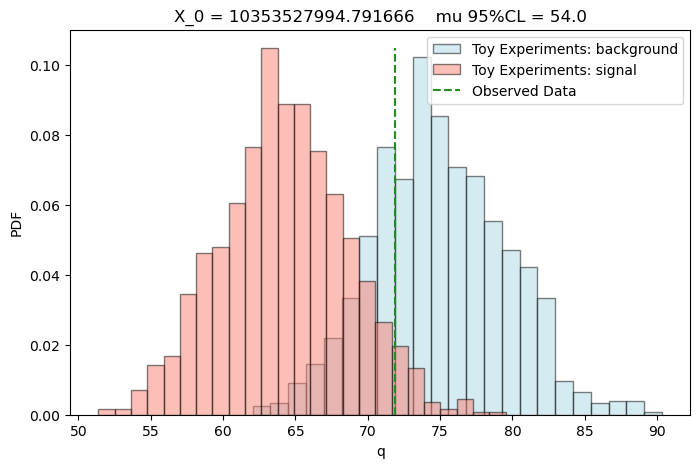

Mu:  20.0    q(mu)_obs = 7.24048134345685 
p_mu = 0.396   p_b = 0.757   ratio = 0.523117569352708 

Mu:  21.0    q(mu)_obs = 8.043323956955646 
p_mu = 0.35   p_b = 0.757   ratio = 0.4623513870541611 

Mu:  22.0    q(mu)_obs = 8.888325156814062 
p_mu = 0.35   p_b = 0.757   ratio = 0.4623513870541611 

Mu:  23.0    q(mu)_obs = 9.775478690123919 
p_mu = 0.339   p_b = 0.757   ratio = 0.4478203434610304 

Mu:  24.0    q(mu)_obs = 10.70477830493246 
p_mu = 0.32   p_b = 0.757   ratio = 0.4227212681638045 

Mu:  25.0    q(mu)_obs = 11.676217750279648 
p_mu = 0.29   p_b = 0.757   ratio = 0.3830911492734478 

Mu:  26.0    q(mu)_obs = 12.689790776152904 
p_mu = 0.261   p_b = 0.757   ratio = 0.34478203434610305 

Mu:  27.0    q(mu)_obs = 13.74549113353055 
p_mu = 0.27   p_b = 0.758   ratio = 0.3562005277044855 

Mu:  28.0    q(mu)_obs = 14.843312574361335 
p_mu = 0.251   p_b = 0.758   ratio = 0.3311345646437995 

Mu:  29.0    q(mu)_obs = 15.983248851567168 
p_mu = 0.253   p_b = 0.758   ratio = 0.3

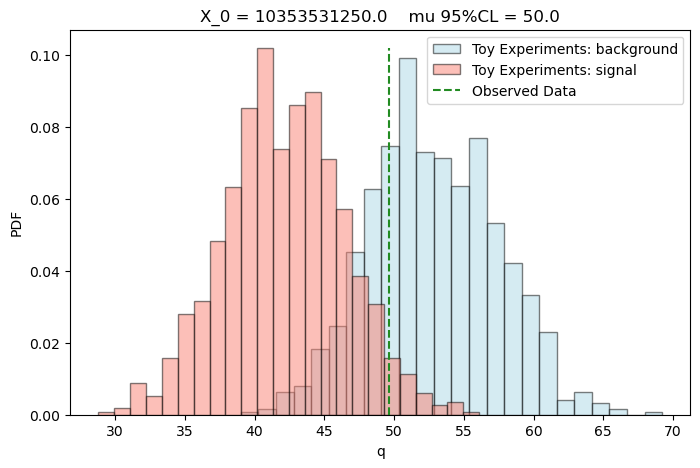

In [21]:
m = np.linspace(20,30,11)
mu_fix = np.concatenate((m,np.array([39,50,54])))
#mu_fix = np.array([54, 50, 39, 30, 25, 20, 15])
_, muCI = stat.stat_test(run=395, x_0=freq[range(150, 200,5)].values, mu_fix=mu_fix,
                         signal=fits.signal_gauss, n_toy=1000,
                         calc_z=False, calc_CI=True, draw=True, verbose=True, path='db/')


In [22]:
muCI

array([27., 20., 21., 22., 24., 29., 39., 54., 54., 50.])

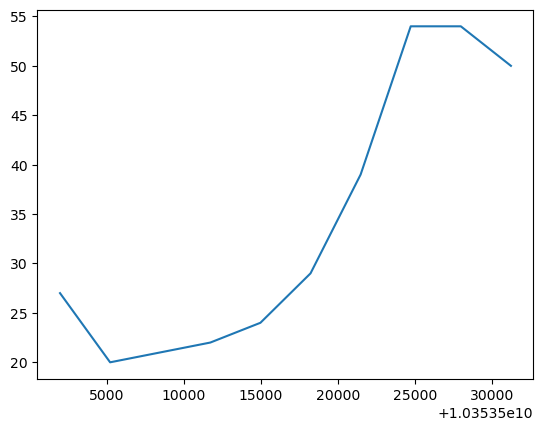

In [23]:
plt.plot(freq[range(150, 200,5)].values, muCI)